In [64]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_context(context='notebook',
                font_scale=1,
                rc=None)
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
path='/content/kc_house_data.csv'
df=pd.read_csv(path)
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [22]:
print(f'Sum of duplicated values: {df.duplicated().sum()}')
print(f'No. of Rows: {df.shape[0]} and No. of Columns: {df.shape[1]}')
print('_'*70)
null_values=[]
null_percentage=[]
dtypes=[]

for i in df.columns:
  null_count=df[i].isna().sum()
  null_per=(null_count/len(df))*100
  null_values.append(null_count)
  null_percentage.append(null_per)
  dtypes.append(df[i].dtype)

missing_data={
    'Columns':df.columns,
    'missing_values':null_values,
    'missing_percentage':null_percentage,
    'data_type':dtypes
}

missing_df=pd.DataFrame(missing_data)
missing_df

Sum of duplicated values: 0
No. of Rows: 21613 and No. of Columns: 20
______________________________________________________________________


,Columns,missing_values,missing_percentage,data_type
0,date,0,0.0,object
1,price,0,0.0,float64
2,bedrooms,0,0.0,int64
3,bathrooms,0,0.0,float64
4,sqft_living,0,0.0,int64
5,sqft_lot,0,0.0,int64
6,floors,0,0.0,float64
7,waterfront,0,0.0,int64
8,view,0,0.0,int64
9,condition,0,0.0,int64


In [25]:
from math import ceil
df[['bedrooms', 'bathrooms']] = df[['bedrooms', 'bathrooms']].applymap(ceil)

In [27]:
df.drop('date', axis=1).describe().T\
    .style.bar(subset=['mean'],color='orange')\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.439273,0.923593,0.000000,2.000000,3.000000,3.000000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000
grade,21613.000000,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,13.000000


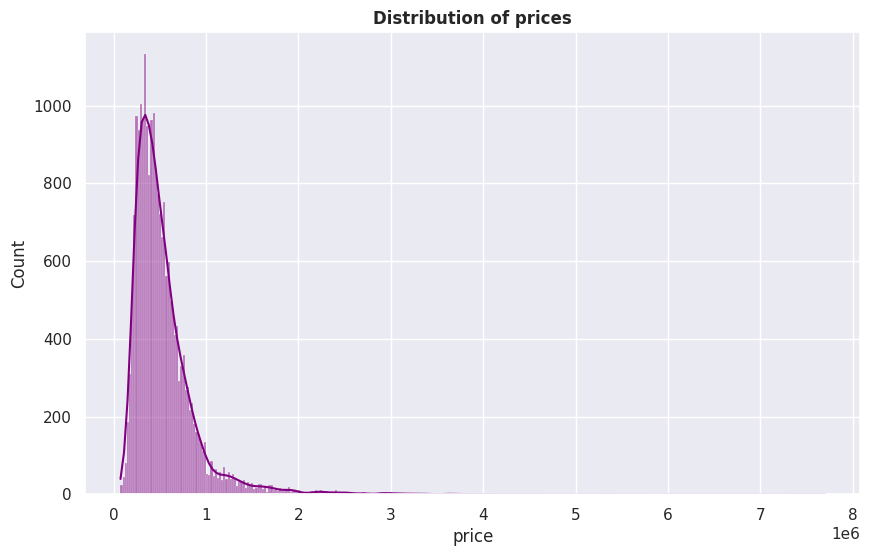

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price',
             color='purple',kde=True)

plt.title('Distribution of prices',fontweight='bold')
plt.show()

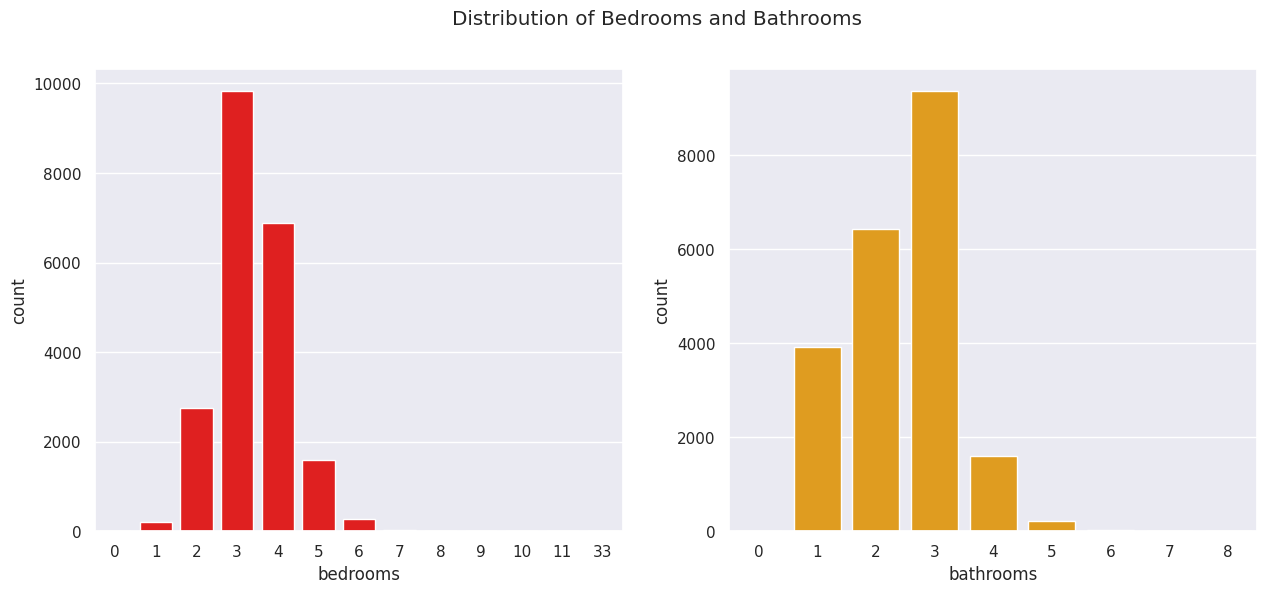

In [33]:
fig,ax=plt.subplots(1,2,figsize=(15,6))

sns.countplot(data=df, x='bedrooms',
              color='red',ax=ax[0])
sns.countplot(data=df,x='bathrooms',
              color='orange',ax=ax[1])

plt.suptitle('Distribution of Bedrooms and Bathrooms')
plt.show()

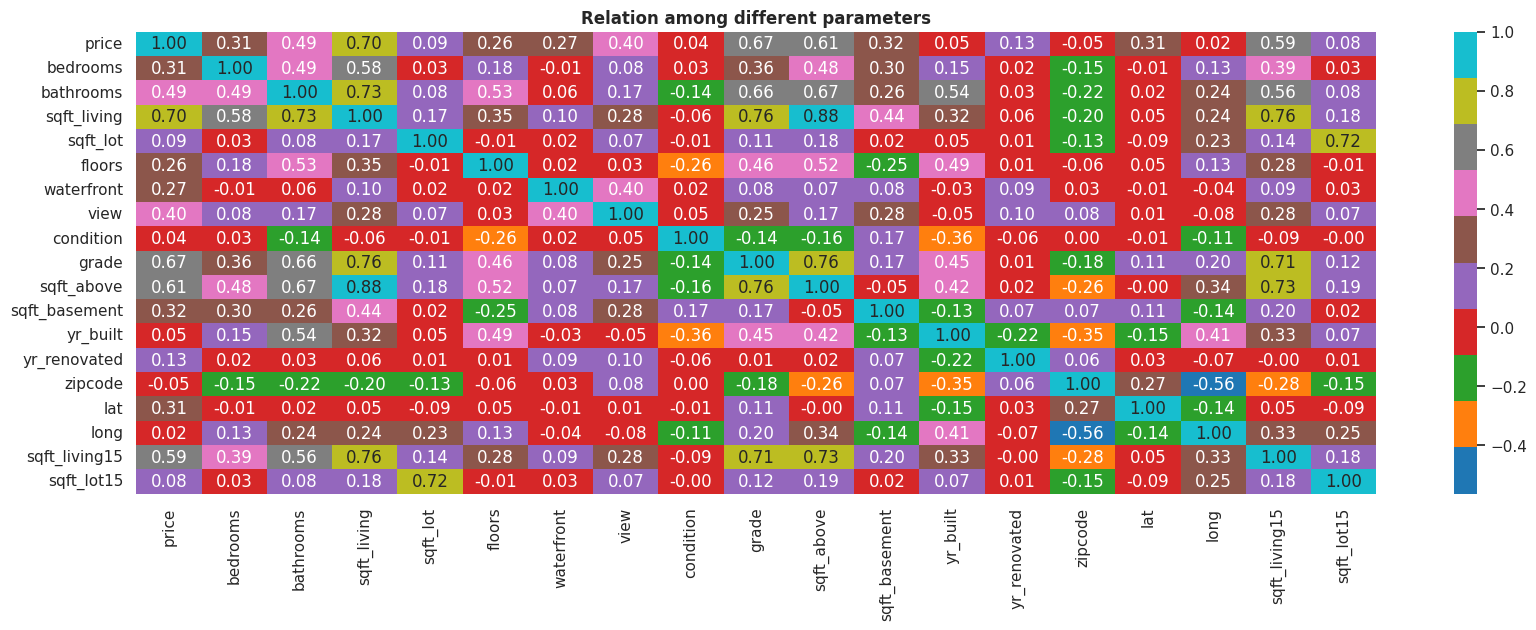

In [36]:
correlation=df.drop('date',axis=1).corr()

plt.figure(figsize=(20, 6))
sns.heatmap(correlation,cmap='tab10',annot=True,fmt='.2f',cbar=True)

plt.title('Relation among different parameters',fontweight='bold')
plt.show()

As 'sqft_living' is highly coorelated with price, therefore:
----------------------------------------------------------------------


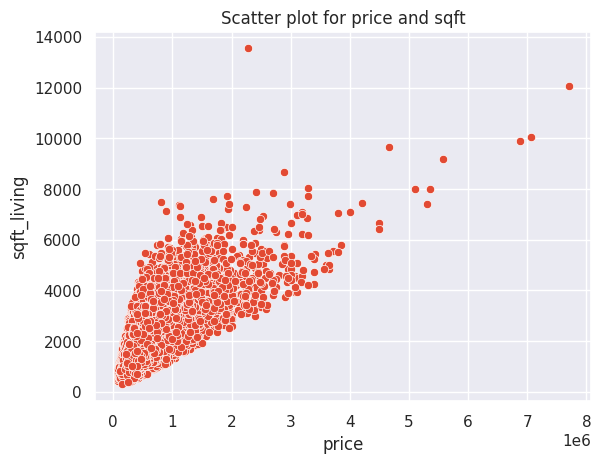

In [42]:
print(f'As \'sqft_living\' is highly coorelated with price, therefore:')
print('-'*70)

sns.scatterplot(data=df,x='price',y='sqft_living')
plt.title('Scatter plot for price and sqft')

plt.show()

As 'sqft_above' is highly coorelated with price, therefore:
----------------------------------------------------------------------


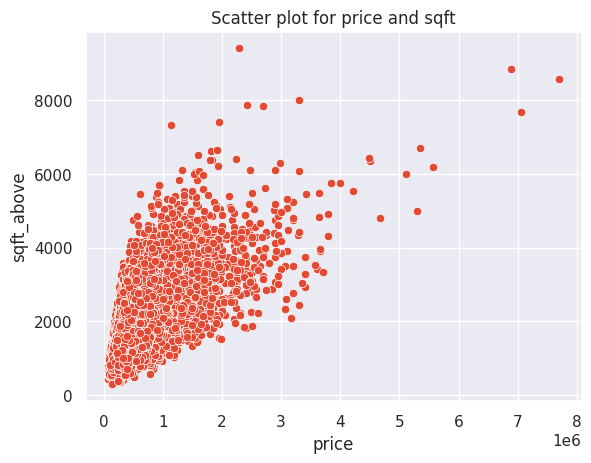

In [43]:
print(f'As \'sqft_above\' is highly coorelated with price, therefore:')
print('-'*70)

sns.scatterplot(data=df,x='price',y='sqft_above')
plt.title('Scatter plot for price and sqft')

plt.show()

Location of houses according to prices and lattitude+longitude
________________________________________________________________________________


<Axes: xlabel='long', ylabel='lat'>

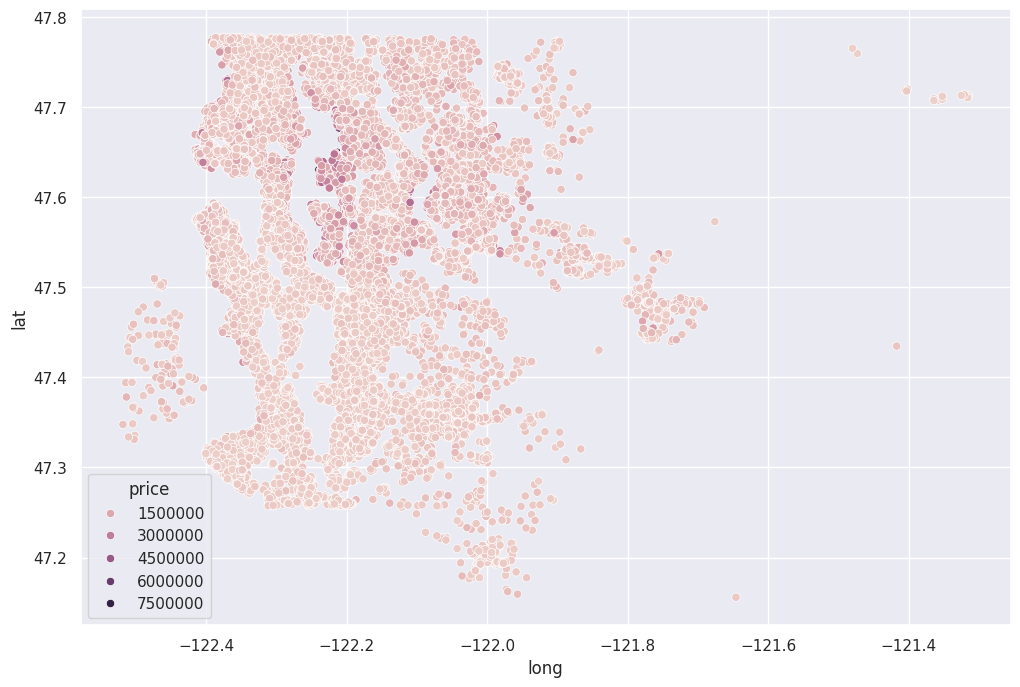

In [44]:
print('Location of houses according to prices and lattitude+longitude')
print('_'*80)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [ ]:
df['date'] = df['date'].apply(pd.to_datetime)
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

Total number of houses sold: 21613
------------------------------------------------------------


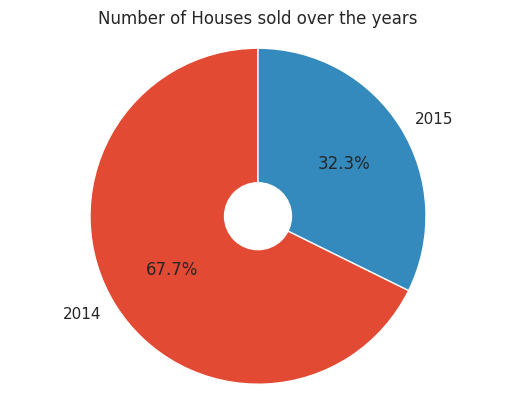

In [54]:
labels=['2014','2015']
print(f'Total number of houses sold: {df.shape[0]}')
print('-'*60)

fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(),labels=labels,
       autopct='%1.1f%%',startangle=90)
centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='black', linewidth=0.8)
ax.add_patch(centre_circle)

ax.axis('equal')
plt.title('Number of Houses sold over the years')
plt.show()

In [56]:
X=df[['bedrooms','bathrooms','sqft_living','sqft_above']]
y=df['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'X Shape: {X_train.shape} & X D\'type: {type(X_train)}')
print(f'y Shape: {y_train.shape} & y D\'type: {type(y_train)}')

X Shape: (17290, 4) & X D'type: <class 'pandas.core.frame.DataFrame'>
y Shape: (17290,) & X D'type: <class 'pandas.core.series.Series'>


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 68742845084.2156


In [63]:
r2 = model.score(X_test, y_test)
print(f'R² Score: {r2}')

R² Score: 0.5072385997429594


In [65]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [66]:
print(scores)

[0.5093702  0.51151308 0.49026996 0.4999815  0.51130422]


'Score is being compromised because of outliers being present.